## FOSS Deep Learning Project

In [1]:
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt
from datetime import *
import autoencoder, classifier, preprocess
import pandas as pd
from autoencoder.CAE_model import *
import os
import seaborn as sn


abs_dir = os.path.abspath('')

full_path = os.path.join(abs_dir, 'relative/path/to/file/you/want')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('ran')

ran


##### Preproccesing

In [ ]:
print('test')

##### Autoencoder

In [ ]:
train_loader = 2
test_loader = 2
b_size = 4
num_epochs = 10
learning_rate = 1e-3

# dimension of the hidden layers
layer_channels = [8, 16, 32]
z_dim = 30

In [ ]:
def conv2D_out_dim(chan, in_dim, kernel, stride, padding, mode = 'Normal'):

    if mode == 'Normal':
        out_dim = ((in_dim + 2 * padding - 1 * (kernel-1))/stride)+1
    #out_dimW = in_dimH if in_dimW is None else in_dimH
    else:
        out_dim = (in_dim - 1) * stride - 2 * padding + (kernel - 1) + 1
        
    return [f'{chan} X {out_dim} X {out_dim}']

print(conv2D_out_dim(chan = 3,
                     in_dim= 17,
                     kernel= 2,
                     stride= 2,
                     padding=1,
                     mode = 'Transpose'))

#prediction = SimpleVAE(data)
#print('Autoencoder are awesome')
data = [[[11,22],
         [33,44]],
        [[55,66],
         [77,88]],
        [[99,10],
         [11,12]]]




"""
TENSOR = torch.rand(128,9,9)
box = torch.tensor(data)
print(TENSOR, box.shape,4*"\n")
flad = torch.flatten(TENSOR)
print('New shape: \n',flad.shape)
"""




#### Simple ANN
###### Classifier taking Feature vectors from autoencoder as input

In [ ]:
X = torch.ones([1, 8,200,89]).to(device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
aemodel = CAE(z_dim=30).to(device)
aemodel.load_state_dict(torch.load('./autoencoder/model_dicts/CAE_10Kmodel.pth', map_location=device))
aemodel.eval()

ENCO = lambda img : aemodel.encode(img)
print(ENCO(X))

In [ ]:
from classifier.MLP_Classifier import *
hidden_out = [18]
ANN_10Kmodel = ANN(30, hidden_out)
ANN_10Kmodel = ANN_10Kmodel.to(device)
learningrate = 0.001  # Insert LR
epochs = 50  # Insert epochs

train_log = []
test_log = []

for epoch in range(epochs):
    print(f'\n\t\t------------------------------Epoch: {epoch + 1}------------------------------')
    tr_loss = train_model(traindataloader, ANN_10Kmodel, ENCO)
    train_log.append(tr_loss)
    
    print('\t\t\t>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<')
    te_loss = model_evaluate(testdataloader, ANN_10Kmodel, ENCO)
    test_log.append(te_loss)
    
torch.save(ANN_10Kmodel.state_dict(), 'classifier/model_dicts/ANN_10Kmodel.pth')

img_name = f"plots/classifier-plots/ANN_10K_Results-{str(datetime.now())[5:-10].replace(' ', '_').replace(':', '-')}.png"
plt.plot(np.arange(len(train_log)), train_log, label='Train')  # etc.
plt.plot(np.arange(len(test_log)), test_log, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Train vs Test loss")
plt.legend()
plt.savefig(img_name, transparent = False)



In [ ]:
#### Plots

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

array = [[33,2,0,0,8,0,0],
        [3,31,0,5,0,0,0],
        [0,4,41,0,54,0,0],
        [0,1,0,30,0,6,0],
        [0,0,0,0,38,10,0],
        [0,23,0,3,1,39,0],
        [0,2,2,0,4,1,31]]


df_cm = pd.DataFrame(array, index = ['Oat', 'Broken', 'Rye', 'Wheat', 'BarleyGreen', 'Cleaved', 'Skinned'],
                  columns = ['Oat', 'Broken', 'Rye', 'Wheat', 'BarleyGreen', 'Cleaved', 'Skinned'])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


   total_bill     sex  day
0       16.99  Female  Sun
1       10.34    Male  Sun
2       21.01    Male  Sun
3       23.68    Male  Sun
4       24.59  Female  Sun


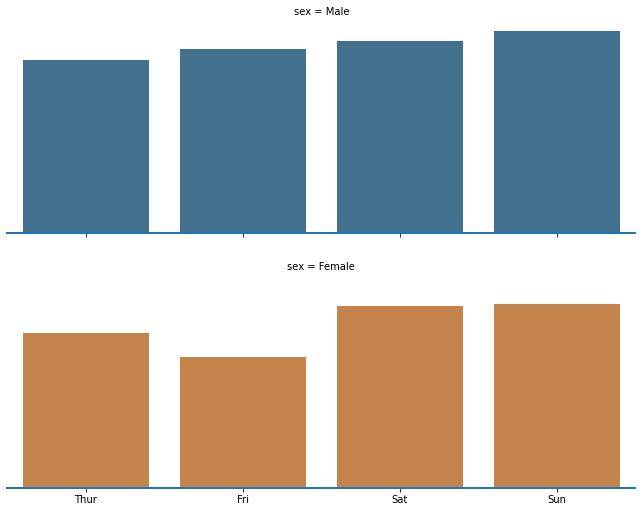

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
tips.pop("tip")
tips.pop("smoker")
tips.pop("time")
tips.pop("size")
print(tips.head())


g = sns.catplot(x='day', y='total_bill', row='sex', hue='sex', data=tips, kind='bar', dodge=False, saturation=.5, ci=None, aspect=0.9)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.set_figheight(7)
g.fig.set_figwidth(10)

# def axla(sex):
#     plt.gca().text(-.02, .2, "sex", fontweight="bold",
#             ha="right", va="center", transform=plt.gca().transAxes)
# g.map(axla,"sex")


g.fig.subplots_adjust(hspace=0.2)
#g.set_titles(" ")

g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()


    Features            g
0  24.841440          Oat
1  19.843090       Broken
2  18.911186          Rye
3  17.276904        Wheat
4  16.825122  BarleyGreen
5  19.928415      Cleaved
6  15.548264      Skinned
7  19.124594      Barley*
8  18.159927          Oat
9  20.120659       Broken
Features
Oat
Broken
Rye
Wheat
BarleyGreen
Cleaved
Skinned
Barley*


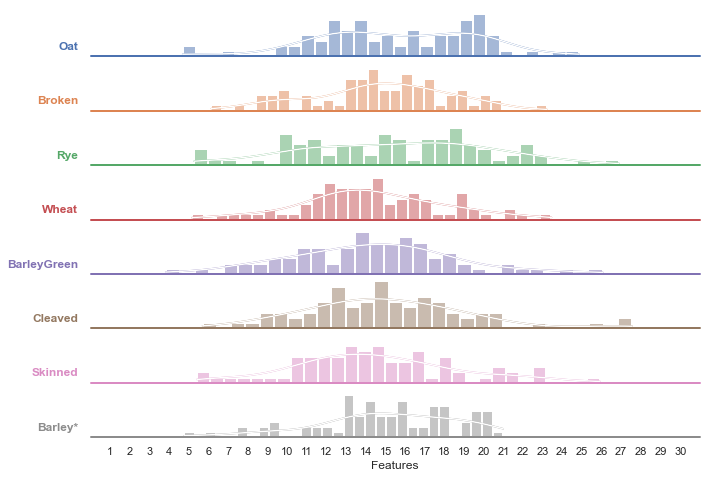

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create some random distribution data and labels, and store them in a dataframe
x = 15 + 4*np.random.randn(640)
g = np.tile(['Oat', 'Broken', 'Rye', 'Wheat', 'BarleyGreen', 'Cleaved', 'Skinned', 'Barley*'], 80)
df = pd.DataFrame(dict(Features=x, g=g))

print(df[:10])


# Initialize the FacetGrid chart object
#pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
#pal = sns.cubehelix_palette(8)
pal = sns.color_palette("deep", n_colors=8)
# g = sns.FacetGrid(df, row="g", hue="g", aspect=6, height=1.0, palette=pal)
g = sns.FacetGrid(df, row="g", hue="g", palette=pal)
g.set(xlim=(0,31),xticks=[i for i in range(1,31)])
''' Alternatively set figsize using the following 2 parameters.'''
g.fig.set_figheight(7)
g.fig.set_figwidth(10)
# or use plt.gcf().set_size_inches(12, 12)

# Draw the densities in a few steps

g.map(sns.histplot, "Features", clip_on=False, alpha=1, lw=1.5, bins=30, kde=True)
g.map(sns.histplot, "Features", clip_on=False, color="w", lw=2, bins=30, kde=True)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
# Values x,y in ax.text(x,y, ...) controls the x,y offset from the x axis.
def label(x, color, label):
    print(label)
    ax = plt.gca()
    ax.text(-.02, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)

# Use ``map()`` to calculate the label positions
print('Features')
g.map(label, "Features")

# Set the subplots to overlap slightly on their vertical direction
g.fig.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap


g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)